In [2]:
%pylab inline
import Quandl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
import pandas as pd
import pandas.io.data as web
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
import patsy
import statsmodels.api as sma

Populating the interactive namespace from numpy and matplotlib


                            OLS Regression Results                            
Dep. Variable:                   tsla   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     274.1
Date:                Mon, 02 Nov 2015   Prob (F-statistic):           4.69e-56
Time:                        18:50:49   Log-Likelihood:                 2688.3
No. Observations:                1315   AIC:                            -5373.
Df Residuals:                    1313   BIC:                            -5362.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0012      0.001      1.344      0.1

c:\Users\Jeremy\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


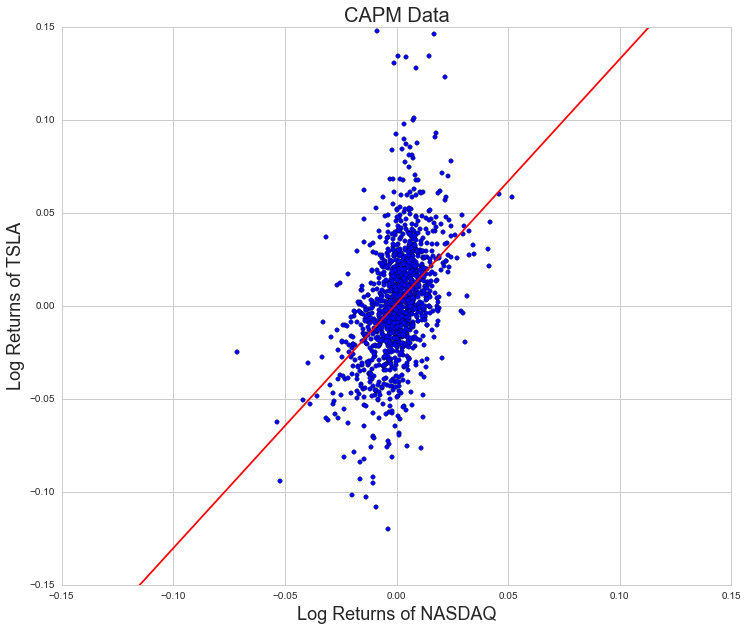

In [4]:
# Question 3

# Fetch Data
tsla = Quandl.get("YAHOO/TSLA", trim_start='2010-7-2', trim_end='2015-9-23')['Adjusted Close']
nasdaq = Quandl.get("NASDAQOMX/COMP", trim_start='2010-7-2', trim_end='2015-9-23')['Index Value']
returns = [pd.DataFrame(np.log(i/i.shift(1)).dropna()) for i in [tsla, nasdaq]]

# Regression
data = pd.merge(returns[1], returns[0], left_index=True, right_index=True)
data.rename(columns={'Index Value':'nasdaq', 'Adjusted Close':'tsla'}, inplace=True)
mod = smf.ols(formula='tsla ~ nasdaq', data = data).fit()

# Plot
figure, ax = plt.subplots(figsize=(12,10))
ax.scatter(returns[1], returns[0])
abline_plot(model_results=mod, ax=ax, color='red')

ax.set_title('CAPM Data', fontsize = 20)
ax.set_ylabel('Log Returns of TSLA', fontsize = 18)
ax.set_xlabel('Log Returns of NASDAQ', fontsize = 18)
ax.set_xlim([-0.15, 0.15])
ax.set_ylim([-0.15, 0.15])

# Print Regression Summary
print mod.summary()

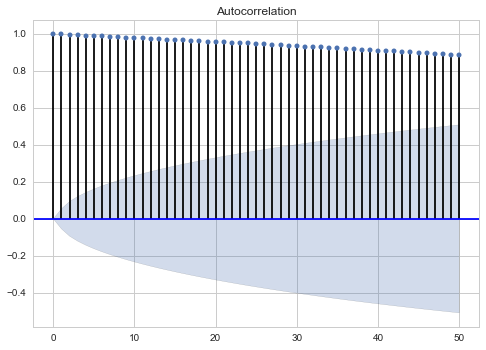

In [12]:
fig = sma.graphics.tsa.plot_acf(tsla, lags=50)

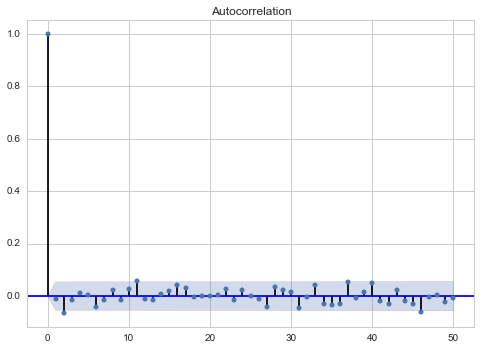

In [13]:
fig = sma.graphics.tsa.plot_acf(returns[0], lags=50)

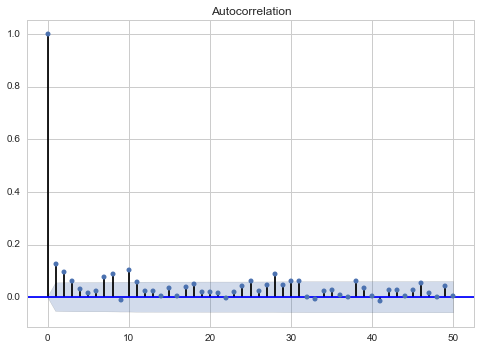

In [17]:
fig = sma.graphics.tsa.plot_acf(np.sqrt(returns[0]**2), lags=50)